In [1]:
# MOVE FUNCTIONS TO SEPARATE NOTEBOOK

In [52]:
# LOAD MODULES
from IPython.core.display import display, HTML # for max width
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
from spacy.tokens import Doc, Span, Token
import scattertext as st
from IPython.display import IFrame
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from scipy import spatial
from scipy.spatial import distance
cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)
import spacy
from spacy import displacy
nlp = spacy.load('en_core_web_lg') 
import warnings
warnings.filterwarnings('ignore')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as analyze_sentiment
sentiment_analyzer = SentimentIntensityAnalyzer()

# LOAD FUNCTIONS
def compareMeanings(words):
    # calculate similarities
    pca = PCA(n_components=2)
    pca.fit([nlp(word).vector for word in words])
    word_vecs_2d = pca.transform([nlp(word).vector for word in words])
    
    # create plot 
    plt.figure(figsize=(10,5))
    plt.scatter(word_vecs_2d[:,0], word_vecs_2d[:,1])
    # for each word and coordinate pair: draw the text on the plot
    for word, coord in zip(words, word_vecs_2d):
        x, y = coord
        plt.text(x, y, word, size= 15)
    #plt.savefig('fig.jpg', dpi=1000)
    # show the plot
    plt.show()
    
    
def mathsOnMeaning(start, subtract, add):
    x = nlp.vocab[start].vector - nlp.vocab[subtract].vector + nlp.vocab[add].vector
    
    similar_words = []
    for word in nlp.vocab:
        if not (word.has_vector & word.is_lower):
            continue
        if not ((word.text!=start)&(word.text!=add)&(word.text!=subtract)):
            continue
     
        similarity = cosine_similarity(x, word.vector)
        similar_words.append((word, similarity))
        
    similar_words = sorted(similar_words, key=lambda item: -item[1])
    result = [w[0].text for w in similar_words[:5]][0]
    print(f"'{start}' minus '{subtract}' add '{add}' = {result}")
    

# set up info
%load_ext watermark
%watermark -m -v -p pandas,numpy,scipy,statsmodels,matplotlib,seaborn,spacy,tqdm,watermark,vaderSentiment

# spacy model info
!python -m spacy info 
#!python -m spacy info en_core_web_md

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
CPython 3.7.6
IPython 7.12.0

pandas 0.25.1
numpy 1.17.2
scipy 1.4.1
statsmodels 0.11.1
matplotlib 3.1.3
seaborn 0.10.0
spacy 2.2.3
tqdm 4.43.0
watermark 2.0.2
vaderSentiment 3.2.1

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
CPU cores  : 12
interpreter: 64bit

============================== Info about spaCy ==============================

spaCy version    2.2.3                         
Location         C:\Users\alexg\Anaconda3\envs\PyR_202003_pandas_0_25_3\lib\site-packages\spacy
Platform         Windows-10-10.0.18362-SP0     
Python version   3.7.6                         
Models                                         



<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Notebooks" data-toc-modified-id="Notebooks-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Notebooks</a></span></li></ul></li><li><span><a href="#Natural-Language-Processing-(NLP)" data-toc-modified-id="Natural-Language-Processing-(NLP)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Natural Language Processing (NLP)</a></span><ul class="toc-item"><li><span><a href="#Search-is-AI-in-action" data-toc-modified-id="Search-is-AI-in-action-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Search is AI in action</a></span></li><li><span><a href="#It-wasn't-always-so-easy" data-toc-modified-id="It-wasn't-always-so-easy-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>It wasn't always so easy</a></span></li><li><span><a href="#Generation-1:-Word-Frequency" data-toc-modified-id="Generation-1:-Word-Frequency-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Generation 1: Word Frequency</a></span><ul class="toc-item"><li><span><a href="#sentiment" data-toc-modified-id="sentiment-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>sentiment</a></span></li><li><span><a href="#limitations" data-toc-modified-id="limitations-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>limitations</a></span></li></ul></li><li><span><a href="#Generation-2:-Word-embeddings" data-toc-modified-id="Generation-2:-Word-embeddings-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Generation 2: Word embeddings</a></span></li></ul></li><li><span><a href="#Using-word-Embeddings" data-toc-modified-id="Using-word-Embeddings-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Using word Embeddings</a></span><ul class="toc-item"><li><span><a href="#Comparing-word-similarity" data-toc-modified-id="Comparing-word-similarity-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Comparing word similarity</a></span></li><li><span><a href="#Comparing-sentence-meaning" data-toc-modified-id="Comparing-sentence-meaning-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Comparing sentence meaning</a></span></li><li><span><a href="#Measuring-sentences-for-target-concept" data-toc-modified-id="Measuring-sentences-for-target-concept-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Measuring sentences for target concept</a></span></li><li><span><a href="#Adding-and-subtracting-meanings" data-toc-modified-id="Adding-and-subtracting-meanings-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Adding and subtracting meanings</a></span></li><li><span><a href="#Syntax" data-toc-modified-id="Syntax-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Syntax</a></span></li><li><span><a href="#Semantic-components" data-toc-modified-id="Semantic-components-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Semantic components</a></span></li></ul></li><li><span><a href="#Use-in-social-research?" data-toc-modified-id="Use-in-social-research?-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Use in social research?</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

**Aims**
- Introduce recent advances in Natural Language Processing (NLP)
- Demonstrate how these advances can be used in social research

**Format**
- Interactive lecture
- Code-along
- RUN THIS LINK

## Notebooks

- Scientific articles separate text from data and analysis.
- Data science notebooks enable researchers and readers to present text, data and analysis side-by-side.
- [Jupyter notebooks](https://jupyter.org/) (and more recently Jupyter Lab) are language agnostic notebooks. 
- They can run many languages, especially: **Ju**lia, **Pyt**hon, and **R**. 
- Initiated in 2014, Jupyter notebooks have rapidly become a [dominant platform for data analysis](https://www.nature.com/articles/d41586-018-07196-1).
- Maybe notebooks will [replace the scientific article](https://www.theatlantic.com/science/archive/2018/04/the-scientific-paper-is-obsolete/556676/).
- Notebooks can display and process numeric, image, sound, and text data.
- Notebooks are an accessible, reproducible and transparent way to share research.
- Here is a [gallery of interesting notebooks](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks).

The current notebook is in Python, so it can run Python code. 

For example:

In [3]:
print('Hello world!')

Hello world!


In [4]:
a = 2
b = 3
a+b

5

Try it: 

1. Insert a new cell: Menu > 'Insert' > 'Insert Cell Above' (or double-tap 'a' (above) or 'b' (below))

1. Type: `name = input('What is your name? ')`

2. Type: `print('Hello ', name)`

3. Press Menu > 'Run' (or shift/ctrl-return)

# Natural Language Processing (NLP)

NLP refers to using computers to search, manipulate and respond to human language.

It is closely connected to AI, Machine Learning, Big Data.

Google, Facebook, etc. are investing vast resources in making computers understand text, image and sound.

## Search is AI in action

Have you noticed how Google search has become very good at [finding what you want](https://www.google.com/intl/en_uk/search/howsearchworks/algorithms/)?

Not only does it index billions of web pages, but, it also:
- spell checks (try: '[appple piee](https://www.google.co.uk/search?hl=en&q=appple%20piee&meta=)')
- considers words in context (try: '[apple shares](https://www.google.co.uk/search?hl=en&q=apple%20shares&meta=)' vs. '[apple pie](https://www.google.co.uk/search?hl=en&q=apple%20pie&meta=)')
- understands synonyms (try: '[apple with pastry top](https://www.google.co.uk/search?hl=en&q=apple%20with%20pastry%20top&meta=)')
- and intent (try: '[how should one prepare a pie made with apples?](https://www.google.co.uk/search?hl=en&q=how%20should%20one%20prepare%20a%20pie%20made%20with%20apples%3F&meta=)')

## It wasn't always so easy

Does anyone remember searching with AltaVista, Lycos, WebCrawler, Ask Jeeves ....

Yahoo search in the 1990s was a glorified telephone directory

![Yahoo search in the 1990s - a glorified telephone directory](yahoo_1990-compressor.jpg)

So, what happened?
1. identifying quality based on links ('page rank') - not our focus
2. advances in understanding the meaning of words - our focus

## Generation 1: Word Frequency

Before 2013 most search was based on words occurance. Given the some text, search engines counted how often words occured.



In [5]:
text_to_search = 'This webpage is about Bob the cat and other cats but not The Cat'

text_to_search.count('cat')

2

In social research, word frequency has been counted since the 1960s.

One of the most popular software platforms for this is the LIWC ('[Linguistic Inquiry Word Count](https://liwc.wpengine.com/)').

This proprietary software was developed by James Pennebaker et al., and has validated psychometric properties ([2015](https://repositories.lib.utexas.edu/bitstream/handle/2152/31333/LIWC2015_LanguageManual.pdf)).

![LIWC](LIWC.jpg)

Indicative research: <br>
- Identifying [authorship in Shakespeare's plays](http://elizabethan-theatre.org/wps/wp-content/uploads/2015/07/Double-Falsehood-by-Ryan-Boyd-Psychological-Science-2015.pdf)
- Longitudinal studies of Mayor [Giuliani's adaptation to the crisis of 9/11](https://www.sciencedirect.com/science/article/abs/pii/S0092656602923494)
- Detecting people's [personality from their writing style](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2885844/?_escaped_fragment_=po=2.77778)
- Monitoring [public anxiety](https://www.tandfonline.com/doi/abs/10.1080/10410236.2011.571759) and public mood (which is [associated with stock prices](https://arxiv.org/pdf/1010.3003&))
- CFOs who copy the CEO style of [speech speak-up less](https://journals.aom.org/doi/abs/10.5465/amj.2016.1062)

But, all these studies use fairly basic word count techniques, or, slightly more advanced sentiment analysis.

### sentiment

In order to analyze concepts, such as [moral foundations](https://moralfoundations.org/other-materials/), researchers developed 'dictionaries', namely, word-lists for targeted concepts.

Some of these dictionaries are elaborate, with each word having a different score, and, ability to handle negations. 

Below, is [VADER](https://github.com/cjhutto/vaderSentiment) - an advanced sentiment analysis dictionary ([Hutto & Gilbert, 2014](https://www.aaai.org/ocs/index.php/ICWSM/ICWSM14/paper/download/8109/8122)).

In [60]:
text = 'i am happy'

sentiment_analyzer.polarity_scores(text)

{'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}

Try changing the above to:
- `'i am not happy'` (basic negation works)
- `'i am not hapy'` (but typos cause a problem)

### limitations

The problems with word counting:
- similarity is based on characters
- 'dog' is not the same as 'Dog' (capital) or 'dgo' (typo)
- 'dog' is similar to 'dogs' (same stem)
- 'dog' is also similar to 'god' (same characters)
- But, 'dog' is not similar to 'labrador' (type of dog) or 'cat' (also a pet)

## Generation 2: Word embeddings

'Word embeddings' were developed by [Yoshua Bengio](https://scholar.google.co.uk/citations?user=kukA0LcAAAAJ&hl=en), [Yann LeCun](https://scholar.google.co.uk/citations?user=WLN3QrAAAAAJ&hl=en&oi=ao), [Geoffrey Hinton](https://scholar.google.co.uk/citations?user=JicYPdAAAAAJ&hl=en&oi=ao) et al. using neural networks and deep learning techniques. This work has recently led to a huge breakthrough in NLP.

The core idea is evident Wittgenstein's ([1953](https://en.wikipedia.org/wiki/Philosophical_Investigations); also Firth, [1957](https://en.wikipedia.org/wiki/John_Rupert_Firth)) insight: the meaning of words comes from the context in which they are used. 

Consider the sentence 'the X sat on the mat' - most people would agree that 'dog' and 'cat' are plausible candidates for X. That is to say, 'dog' and 'cat' occupy similar roles within similar sentences. 

This is also the core idea behind predictive text: where algorithms try to predict the next word you might use on the basis of what has been typed. ([Demo: can predictive text finish your manuscript?](https://talktotransformer.com/)).

These are statistical models of language. Based on huge (billions of words) datasets, the statistics are used to predict words.

The key idea: instead of counting words, ignore the word itself, and count the words that it co-occurs with.

This might seem odd, but, when scaled accross billions of pages of text (books, webpages) it produces models that *seem to encode meaning.

Word embeddings encode the meaning of words not in terms of the words themselves, but, in terms of the context in which the words appear. By analyzing billions of webpages and books, statistical models are built based on which words occur in the same context. These models _seem_ to encode meaning.

Here is an [interactive illustration](https://projector.tensorflow.org/) of a small model (10k words mapped in 200 dimensions).


# Using word Embeddings

## Comparing word similarity
Most people would agree that 'dog' is more similar to 'cat' than 'road' - and the models agree:

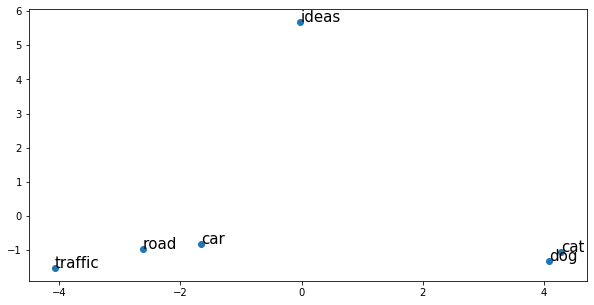

In [61]:
words = ['dog', 'cat', 'car', 'road', 'traffic', 'ideas']
    
compareMeanings(words)

Change the above code, to see how similar `'dog'`, `'Dog'`, `'canine'`, and `'K9'` are.

## Comparing sentence meaning

We can also use these models to compare sentences. Consider the following (all using unique words). Just by averaging the word embeddings for each sentence, we can see, that the model corresponds broadly to our human judgement. <br>
<br>
Change the sentences and re-run the cell to see the result.

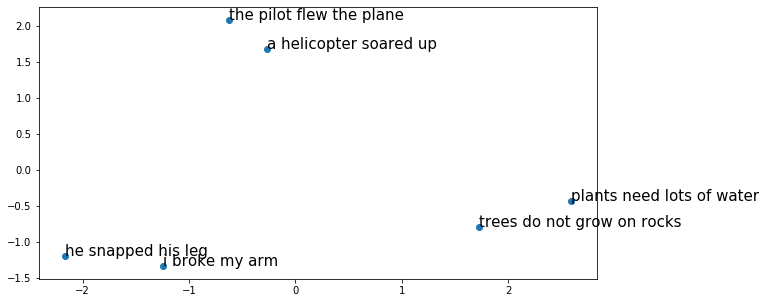

In [62]:
sentences = ['the pilot flew the plane', 
             'trees do not grow on rocks',
             'i broke my arm', 
             'he snapped his leg',
             'a helicopter soared up',
             'plants need lots of water']

compareMeanings(sentences)

## Measuring sentences for target concept
The idea here comes from the [Garten et al. (2018)](https://link.springer.com/article/10.3758/s13428-017-0875-9) who argue that 

In [63]:
target = 'died'

sentences = ["Superb excellent ++",
             'accessible car park',
             'my arm broke', 
             'she was dying', 
             'he died later',
             'died died died']

for sent in sentences:
    score = round(nlp(sent).similarity(nlp(target)), 2)
    print("Similarity to 'died':  {:<4}  '{:}'".format(score, sent))

Similarity to 'died':  0.04  'Superb excellent ++'
Similarity to 'died':  0.2   'accessible car park'
Similarity to 'died':  0.4   'my arm broke'
Similarity to 'died':  0.68  'she was dying'
Similarity to 'died':  0.85  'he died later'
Similarity to 'died':  1.0   'died died died'


The above code can be reporposed to measure any concept that manifests in textual data.

For example, change the target concept to:
- `'happy wonderful brilliant super'` to measure sentiment
- `'trust'` to measure trust
- `'anxiety'` to measure anxiety


## Adding and subtracting meanings

Meanings are represented by numbers (e.g., 300 dimension = list of 300 numbers)

This means that meanings can be added and subtracted.

Here are the words near 'died dead and dying'. 

But, people tend to die in two ways: unintentional and intentional (murder). <br>
To find words associated with intentionall death, we subtract the concept of 'accident' and add the concept 'murder'.

In [95]:
def calculateVector(start, subtract, add, n=5):
    x = nlp.vocab[start].vector - nlp.vocab[subtract].vector + nlp.vocab[add].vector
    
    similar_words = []
    for word in nlp.vocab:
        if not (word.has_vector & word.is_lower):
            continue
        if not ((word.text!=start)&(word.text!=add)&(word.text!=subtract)):
            continue
     
        similarity = cosine_similarity(x, word.vector)
        similar_words.append((word.text, similarity))
        
    similar_words = sorted(similar_words, key=lambda item: -item[1])
    result = pd.DataFrame(similar_words, columns=['word', 'similarity'])
    with pd.option_context('display.max_rows', None):
        display(result.head(n))

In [99]:
calculateVector(start='doctor', subtract='man', add='woman', n=5)

,word,similarity
0,nurse,0.702265
1,doctors,0.675905
2,physician,0.668101
3,pregnant,0.665777
4,gynecologist,0.629010


In [100]:
calculateVector(start='doctor', subtract='woman', add='man', n=5)

,word,similarity
0,physician,0.627890
1,doctors,0.591856
2,medicine,0.569031
3,surgeon,0.563236
4,pharmacist,0.547604


In [101]:
calculateVector(start='king', subtract='man', add='woman', n=5)

,word,similarity
0,queen,0.788084
1,prince,0.640108
2,kings,0.620854
3,princess,0.612564
4,royal,0.580097


In [102]:
calculateVector(start='uk', subtract='london', add='geneva', n=5)

,word,similarity
0,switzerland,0.536004
1,usa,0.526874
2,canada,0.517747
3,wisconsin,0.508208
4,australia,0.463609


- Try: 'uk' minus 'london' add 'geneva'
- Try: 'berlin' minus 'germany' add 'france'
- Try: 'india' minus 'curry' add 'pizza'
- Try: 'man' minus 'boy' add 'girl'
- Try: 'paris' minus 'france' add 'uk'

## Syntax

Language models have also been developed to understand the syntactic components of text.

These models identify traditional grammatical components (e.g., pronouns, verbs, nouns) and 'dependency grammar' - which is how the words are related to one another (e.g., who is the subject of the verb).


In [21]:
text = "i went to the shop"
displacy.render(nlp(text), style="dep", jupyter=True)

Change the text in the above example to try and confuse the language model.
- try: `'to the shop i went'`
- try: `'i weeent to the shopppp'`

## Semantic components

Using the analysis of syntax, the language models have become quite good at identifying people, organisations, products, dates, etc.

In [22]:
text = 'Elon Musk is CEO of Tesla'
displacy.render(nlp(text), jupyter=True, style="ent")

Again, these language models have a degree of robustness against unfamiliar words and typos. 

- Try a typo: `'Elon Mussk is CEO of Tsla'`
- Try: `'I saw the mona lisa on the 25th of sept'`

# Use in social research?

[Salganik (2019)](https://www.bitbybitbook.com/en/1st-ed/preface/) gives a good overview of the impact of NLP (and data science in general) on social research

Popular apps and web-pages provide:
1. Analysis of [speeches in parliament](https://pudding.cool/2018/07/women-in-parliament/) (very good)
1. Analysis of [Trump's Tweets](https://www.dremio.com/trump-twitter-sentiment-analysis/)


There is an ever-growing list of datasets:
- Github has a community maintained list of [big data sets](https://github.com/awesomedata/awesome-public-datasets#socialsciences)
- The Internet Archive has a [data collection](https://archive.org/details/datasets)
- Google has launched a search engine [just for data](https://datasetsearch.research.google.com/)
- And here is a [huge collection of text data](https://datasets.quantumstat.com/)
                           

These datasets grow rapidly. For COVID-19, there is already:
- 4 million Tweets per day, [available for download](http://www.panacealab.org/covid19/)
- Google social distancing data, [for all major regions in 131 countries](https://www.google.com/covid19/mobility/)
- And, of course, the WHO COVID-19 mortality data is [available for download](https://covid.ourworldindata.org/data/owid-covid-data.csv)

Examples of recent research:
- Organizations that have diversity within employees are more creative & profitable ([Corritore et al., 2019](https://journals.sagepub.com/doi/abs/10.1177/0001839219844175))

- Detecting unsafe restaurants based on phone location and searches ([Sadilek et al., 2018](https://www.nature.com/articles/s41746-018-0045-1.pdf?origin=ppub))

- Simulating human judgement using distributed language models ([Bhatia et al., 2019](https://www.sciencedirect.com/science/article/pii/S2352154618301712))


# Conclusion


